# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup (Loading Data Set into our DataFrame)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [3]:
path = "drive/MyDrive/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [5]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [6]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

**Report:**
**We donot have Null values in our data set**

In [7]:
df.duplicated().sum()

0

Report:

We did not have duplicated values in our data set. **bold text**

In [8]:
# define numerical & categorical columns
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature= [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_feature_removed= [feature for feature in df.columns[3:] if df[feature].dtype == 'O']


# print columns
print('We have {} numerical features : {}'.format(len(numerical_feature), numerical_feature))
print('We have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))

We have 3 numerical features : ['unit_price', 'quantity', 'total']
We have 6 categorical features : ['transaction_id', 'timestamp', 'product_id', 'category', 'customer_type', 'payment_type']


---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

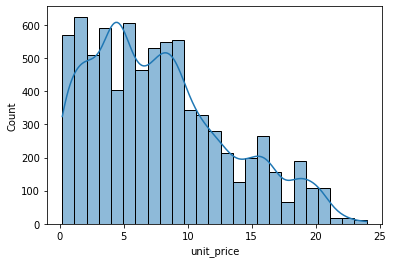

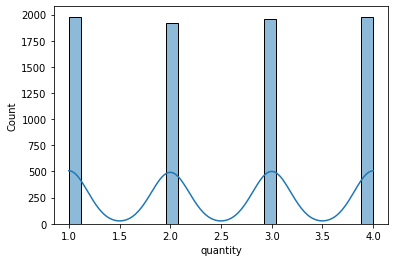

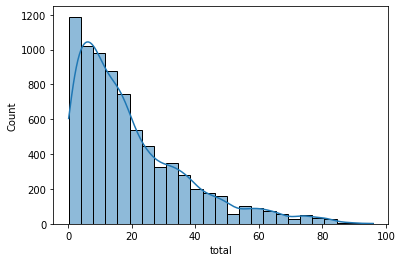

In [9]:
#This is to visualise the distribution of numeric columns.

for col in [col for col in df.columns if df[col].dtype != 'object']:
  sns.histplot(x=col, data=df, bins=25, kde=True)
  plt.show()

In [10]:
#This is to show how many unique values are present within a column for numerical_feature

for feature in numerical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].value_counts(ascending=False))))


The feature is unit_price and number of categories are 64
The feature is quantity and number of categories are 4
The feature is total and number of categories are 256


In [11]:
for feature in categorical_feature_removed:
    print('The feature is {} and number of categories are: \n{}'.format(feature,df[feature].value_counts(ascending=False)))

The feature is category and number of categories are: 
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64
The feature is customer_type and number of categories are: 
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64
The feature is payment_type and number of categories are: 
cash           2027
credit car

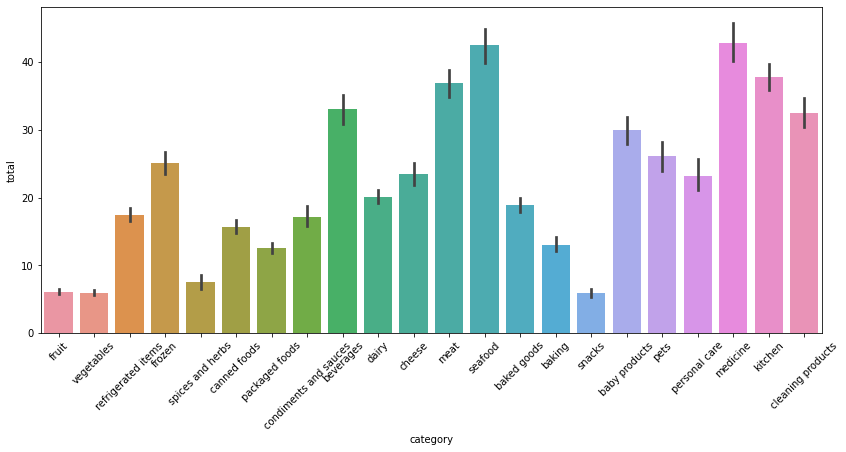

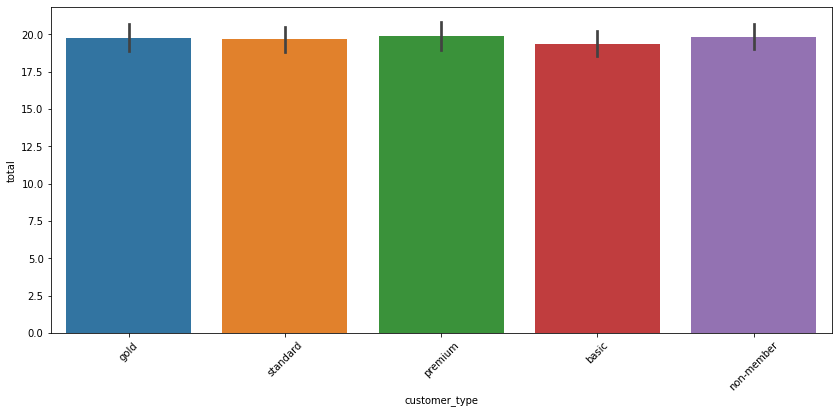

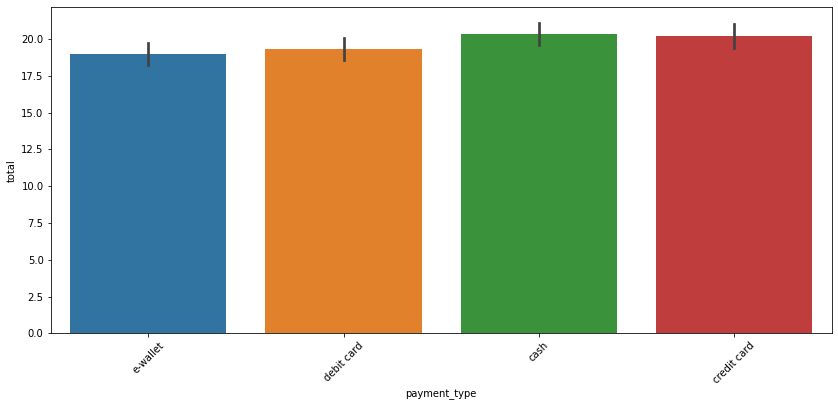

In [12]:
for col in [col for col in df.columns[3:] if df[col].dtype == 'object']:
  plt.figure(figsize=(14,6))
  plt.xticks(rotation=45)
  sns.barplot(x=col, y='total', data=df)
  plt.show()

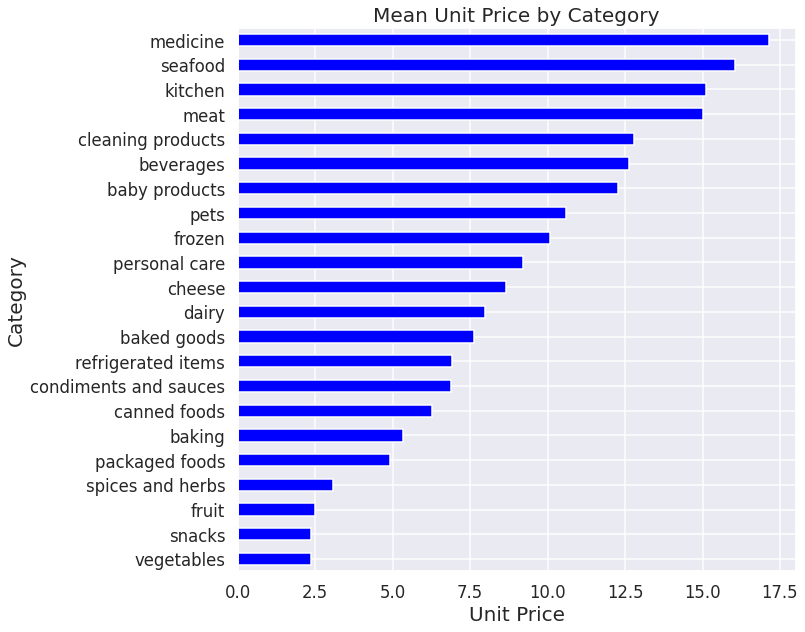

In [13]:
# Use seaborn to create the barh plot
sns.set_style("darkgrid")
sns.set_context("talk")
plt.figure(figsize=(10,10))
df.groupby('category')['unit_price'].mean().sort_values().plot(kind='barh', color='b')


# Add labels and title
plt.xlabel("Unit Price", fontsize=20)
plt.ylabel("Category", fontsize=20)
plt.title("Mean Unit Price by Category", fontsize=20)

# Show the plot
plt.show()

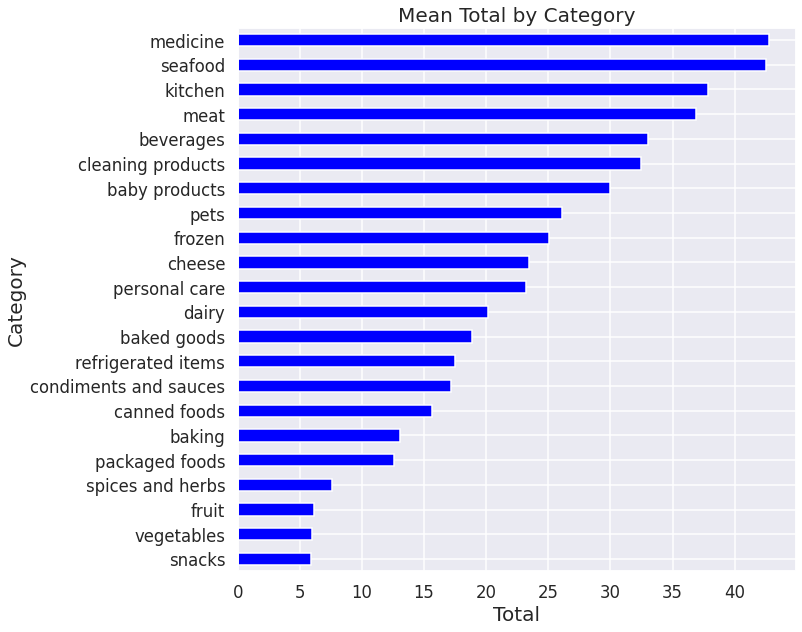

In [14]:
# Use seaborn to create the barh plot
sns.set_style("darkgrid")
sns.set_context("talk")
plt.figure(figsize=(10,10))
df.groupby('category')['total'].mean().sort_values().plot(kind='barh', color='b')


# Add labels and title
plt.xlabel("Total", fontsize=20)
plt.ylabel("Category", fontsize=20)
plt.title("Mean Total by Category", fontsize=20)

# Show the plot
plt.show()

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [15]:
# This is to plot the correlations between the numeric columns within the data
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for



These are the possible insights that you could draw from the provided data set.

1) Medicine and seafood have the highest sales, which indicates that they are popular items among customers and have a high demand.

2) Fruits, vegetables and snacks are the least frequently bought categories, which suggests that these items are not in demand among customers and some steps need to be taken to increase the count.

3) The "Category" column contains a variety of different items, which makes it a good candidate for modeling because it can provide valuable information about the customer's purchasing habits and preferences.